## FDTree Class

In [1]:
import time
import klepto
import shelve
import pickle
import h5py
import numpy as np
from scipy.sparse import *
import matplotlib.pyplot as plt

In [2]:
dataset = '1m'

In [3]:
feature=h5py.File('movielens/test_list.mat')  
test_list = feature['test_list'][:]
test_list = list(map(int, test_list.T[0]))
test_list = [i-1 for i in test_list] 
feature=h5py.File('movielens/train_list.mat')  
train_list = feature['train_list'][:]
train_list = list(map(int, train_list.T[0]))
train_list = [i-1 for i in train_list] 

In [4]:
rating_matrix_csc = load_npz('movielens/sparse_matrix_ml-' + dataset + '_selected.npz').tocsc()
rating_matrix_csc_train = rating_matrix_csc[:, train_list]
rating_matrix_csc_test  = rating_matrix_csc[:, test_list]
print("file load DONE")
depth_threshold = 4

file load DONE


In [5]:
with h5py.File('treeFile/lr_bound.mat') as data:
    lr_bound_list = [data[element[0]][:] for element in data['lr_bound']]

i = 0
for i in range(len(lr_bound_list)):
    level = lr_bound_list[i]
    lr_bound_list[i] = []
    level = list((level.T)[0])
    for boundNum in range(0, len(level), 2):
        lr_bound_list[i].append([int(level[boundNum]) - 1, int(level[boundNum + 1]) - 1])
    i += 1

lr_bound = {}
for i in range(len(lr_bound_list)):
    lr_bound[str(i)] = lr_bound_list[i]

In [6]:
feature=h5py.File('treeFile/tree.mat')  
tree = list(feature['tree'][:].T[0])
tree = [i-1 for i in tree]

## MF part

In [7]:
from pyspark import SparkConf
from pyspark import SparkContext
from pyspark.mllib.recommendation import ALS

class MatrixFactorization:
    def __init__(self, maxIter=15, regParam=0.01, rank=10):
        self.maxIter = maxIter
        self.regParam = regParam
        self.rank = rank
        conf = SparkConf().setAppName("appName").setMaster("local[*]")
        conf.set("spark.driver.memory","8g")
        conf.set("spark.executor.memory","8g")
        self.spark = SparkContext(conf=conf)                    
        print("New SparkSession started...")

    def change_parameter(self, regParam):
        self.regParam = regParam

    def matrix_factorization(self, train_lst):
        ratings = self.spark.parallelize(train_lst)
        model = ALS.train(ratings, self.rank, seed=10, \
                          iterations=self.maxIter, \
                          lambda_=self.regParam)
        print("MF DONE")
        userFeatures = sorted(model.userFeatures().collect(), key=lambda d: d[0], reverse=False)
        productFeatures = sorted(model.productFeatures().collect(), key=lambda d: d[0], reverse=False)
        userProfile = {each[0]: each[1].tolist() for each in userFeatures}
        itemProfile = {each[0]: each[1].tolist() for each in productFeatures}
        
        
        return userProfile, itemProfile

    def end(self):
        self.spark.stop()
        print("SparkSession stopped.")

In [8]:
lambda_list = [0.005, 0.025, 0.05, 0.075, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40]

In [9]:
MF = MatrixFactorization()

New SparkSession started...


level: 0
Rating Number of level 0: 6040
Current plambda: 0.005
MF DONE
Current RMSE: 1.02892730665
Current plambda: 0.025
MF DONE
Current RMSE: 1.02888378957
Current plambda: 0.05
MF DONE
Current RMSE: 1.02903817214
Current plambda: 0.075
MF DONE
Current RMSE: 1.02969409904
Current plambda: 0.1
MF DONE
Current RMSE: 1.03104686169
Current plambda: 0.15
MF DONE
Current RMSE: 1.03602582432
Current plambda: 0.2
MF DONE
Current RMSE: 1.04372391144
Current plambda: 0.25
MF DONE
Current RMSE: 1.05368260066
Current plambda: 0.3
MF DONE
Current RMSE: 1.06565164012
Current plambda: 0.35
MF DONE
Current RMSE: 1.07953468376
Current plambda: 0.4
MF DONE
Current RMSE: 1.09528678597
min RMSE: 1.02888378957


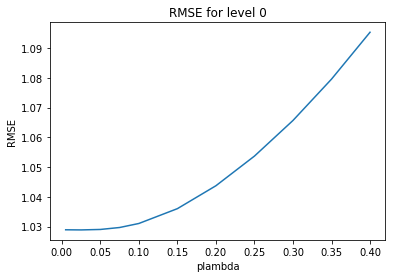

level: 1
Rating Number of level 1: 17960
Current plambda: 0.005
MF DONE
Current RMSE: 1.01336452598
Current plambda: 0.025
MF DONE
Current RMSE: 1.01185567314
Current plambda: 0.05
MF DONE
Current RMSE: 1.01102202946
Current plambda: 0.075
MF DONE
Current RMSE: 1.01142719632
Current plambda: 0.1
MF DONE
Current RMSE: 1.01324484541
Current plambda: 0.15
MF DONE
Current RMSE: 1.02125904377
Current plambda: 0.2
MF DONE
Current RMSE: 1.03446883731
Current plambda: 0.25
MF DONE
Current RMSE: 1.0470611903
Current plambda: 0.3
MF DONE
Current RMSE: 1.05946448153
Current plambda: 0.35
MF DONE
Current RMSE: 1.07367608223
Current plambda: 0.4
MF DONE
Current RMSE: 1.0897297105
min RMSE: 1.01102202946


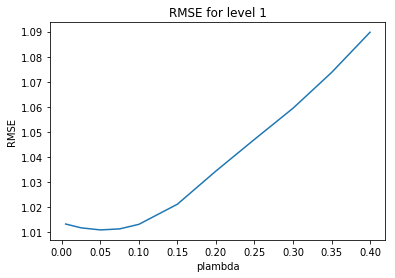

level: 2
Rating Number of level 2: 49309
Current plambda: 0.005
MF DONE
Current RMSE: 1.03488175713
Current plambda: 0.025
MF DONE
Current RMSE: 1.00290942841
Current plambda: 0.05
MF DONE
Current RMSE: 0.996111526985
Current plambda: 0.075
MF DONE
Current RMSE: 0.993788342173
Current plambda: 0.1
MF DONE
Current RMSE: 0.994495845518
Current plambda: 0.15
MF DONE
Current RMSE: 1.00359016432
Current plambda: 0.2
MF DONE
Current RMSE: 1.01546164539
Current plambda: 0.25
MF DONE
Current RMSE: 1.02911836982
Current plambda: 0.3
MF DONE
Current RMSE: 1.04154339052
Current plambda: 0.35
MF DONE
Current RMSE: 1.05562886251
Current plambda: 0.4
MF DONE
Current RMSE: 1.07154853583
min RMSE: 0.993788342173


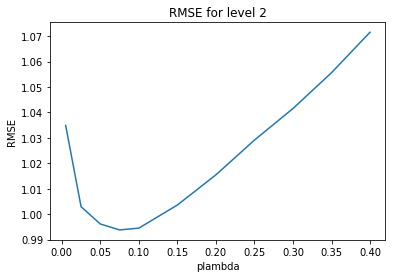

level: 3
Rating Number of level 3: 115742
Current plambda: 0.005
MF DONE
Current RMSE: 1.03308166681
Current plambda: 0.025
MF DONE
Current RMSE: 1.01218834736
Current plambda: 0.05
MF DONE
Current RMSE: 1.000884684
Current plambda: 0.075
MF DONE
Current RMSE: 0.994849566724
Current plambda: 0.1
MF DONE
Current RMSE: 0.992825918562
Current plambda: 0.15
MF DONE
Current RMSE: 0.998791121665
Current plambda: 0.2
MF DONE
Current RMSE: 1.01215171891
Current plambda: 0.25
MF DONE
Current RMSE: 1.02583674152
Current plambda: 0.3
MF DONE
Current RMSE: 1.03801175017
Current plambda: 0.35
MF DONE
Current RMSE: 1.05201865652
Current plambda: 0.4
MF DONE
Current RMSE: 1.06796596095
min RMSE: 0.992825918562


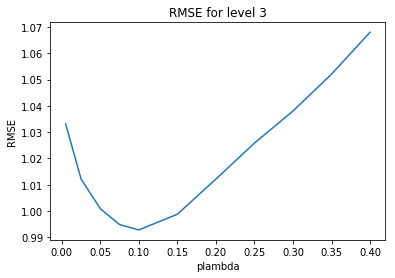

level: 4
Rating Number of level 4: 231579
Current plambda: 0.005
MF DONE
Current RMSE: 1.0248725323
Current plambda: 0.025
MF DONE
Current RMSE: 1.00619648534
Current plambda: 0.05
MF DONE
Current RMSE: 0.994682322837
Current plambda: 0.075
MF DONE
Current RMSE: 0.988618763425
Current plambda: 0.1
MF DONE
Current RMSE: 0.987229290053
Current plambda: 0.15
MF DONE
Current RMSE: 0.995254649331
Current plambda: 0.2
MF DONE
Current RMSE: 1.00962156115
Current plambda: 0.25
MF DONE
Current RMSE: 1.02211752944
Current plambda: 0.3
MF DONE
Current RMSE: 1.03364729171
Current plambda: 0.35
MF DONE
Current RMSE: 1.0471470833
Current plambda: 0.4
MF DONE
Current RMSE: 1.06267282832
min RMSE: 0.987229290053


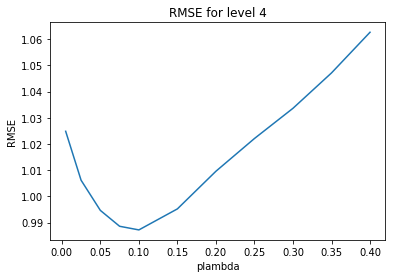

In [10]:
prediction_model = {}
rmst_dict = {"0":[],"1":[],"2":[],"3":[],"4":[],"5":[],"6":[],"7":[],"8":[],"9":[],"10":[]}
min_rmse_list = []
for level in range(depth_threshold + 1):
    
    with h5py.File('treeFile/targetNode_' + str(level + 1) + '.mat') as data:
        targetNode = [data[element[0]][:] for element in data['targetNode']]
    with h5py.File('treeFile/rated_user_' + str(level + 1) + '.mat') as data:
        rated_users = [data[element[0]][:] for element in data['rated_user']]
    
    level = str(level)
    print("level:", level)    
                   
    prediction_model.setdefault(level, {})
    train_lst = []    
    
    for pseudo_user_bound, userid in zip(lr_bound[level], range(len(lr_bound[level]))):
        if pseudo_user_bound[0] > pseudo_user_bound[1]:
            continue
        pseudo_user_lst = tree[pseudo_user_bound[0]:(pseudo_user_bound[1] + 1)]
        ratings_Pseudo_u2i = np.array(rating_matrix_csc_train[:, pseudo_user_lst].sum(axis=1))[:,0] / \
                                     (rating_matrix_csc_train[:, pseudo_user_lst].getnnz(axis=1)+1e-9)
        train_lst += [(userid, itemid, float(ratings_Pseudo_u2i[itemid])) \
                      for itemid in range(ratings_Pseudo_u2i.shape[0]) if ratings_Pseudo_u2i[itemid]]        

    print("Rating Number of level " + level + ": " + str(len(train_lst)))
    
    #### Train MF and Do validation ####
    min_RMSE = -1
    user_profile_list = []
    item_profile_list = []
    for plambda in lambda_list:
        print("Current plambda: " + str(plambda))
        MF.change_parameter(plambda)
        user_profile, item_profile = MF.matrix_factorization(train_lst)
        user_profile_list.append(user_profile)
        item_profile_list.append(item_profile)
        prediction_model[level]['upro'], prediction_model[level]['ipro'], prediction_model[level]['plambda'] \
                                         = user_profile, item_profile, plambda
        rmse = 0
        rmseNum = 0
        for userid in range(rating_matrix_csc_test.shape[1]):
    #         if userid % 100 == 0:
    #             print("%.2f%%" % (100 * userid / rating_matrix_csc_test.shape[1]))  
    
            pred_index = int(targetNode[userid].T[0][1]) - 1
            final_level = int(targetNode[userid].T[0][0]) - 1
            if rated_users[userid].sum() == 0:
                rated_item = []
            else:
                rated_item = [int(i-1) for i in list(set(rated_users[userid][0]))]
            
            pred_rating = np.dot(np.array(prediction_model[str(final_level)]['upro'][pred_index]), \
                                 np.array(list(prediction_model[str(final_level)]['ipro'].values())).T) 
            real_rating = rating_matrix_csc_test[:, userid].toarray()
            
            non_zeros = list(np.nonzero(real_rating)[0])
            non_zeros = list(set(non_zeros).difference(set(rated_item)))
            non_zerosNum = pred_rating[non_zeros].shape[0]
            rmse += np.sum((pred_rating[non_zeros].T.reshape(non_zerosNum, 1)-real_rating[non_zeros])**2)
            rmseNum += len(non_zeros)
            
        RMSE = (rmse/rmseNum)**0.5
        print("Current RMSE: " + str(RMSE))
        rmst_dict[level].append(RMSE)
        
    min_MF = rmst_dict[level].index(min(rmst_dict[level]))   
    prediction_model[level]['upro'] = user_profile_list[min_MF]
    prediction_model[level]['ipro'] = item_profile_list[min_MF]
    prediction_model[level]['plambda'] = lambda_list[min_MF]
    print("min RMSE: " + str(min(rmst_dict[level])))
    min_rmse_list.append(min(rmst_dict[level]))
    
    plt.figure(1)
    plt.title('RMSE for level ' + level)
    plt.xlabel('plambda')
    plt.ylabel('RMSE')
    plt.plot(lambda_list, rmst_dict[level])
    plt.show()

In [11]:
MF.end()

SparkSession stopped.


In [12]:
import klepto
Tree = klepto.archives.dir_archive('treeFile', cached=True, serialized=True)
Tree['prediction_model'] = prediction_model
Tree.dump()
Tree.clear()

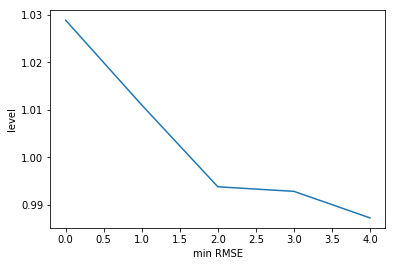

In [13]:
plt.figure(1)
plt.xlabel('min RMSE')
plt.ylabel('level')
plt.plot(list(range(5)), min_rmse_list)
plt.show()